In [8]:



tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5ForConditionalGeneration.from_pretrained('google/t5-v1_1-base')


# T5 inference
input_ids = tokenizer("summarize: The tower is 324 metres (1,063 ft) tall, ", return_tensors="pt").input_ids  # Batch size 1
outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))
# studies have shown that owning a dog is good for you.

....tt.t.t.


In [9]:
import transformers

from transformers import T5Tokenizer, T5ForConditionalGeneration
from transformers import BartForConditionalGeneration,BartTokenizer
import datasets
from datasets import load_dataset


dataset = load_dataset('xsum',split='validation')


Using custom data configuration default
Reusing dataset xsum (/home/jcxu/.cache/huggingface/datasets/xsum/default/1.2.0/4957825a982999fbf80bca0b342793b01b2611e021ef589fb7c6250b3577b499)


In [22]:
import pickle
import pandas as pd

with open('../tmp_data.pkl','rb') as fd:
    df =pickle.load(fd)
print(df)

                                                   gen  \
0    Apple has been accused of misleading Australia...   
1    Apple has been accused of misleading Australia...   
2    Apple has been accused of misleading Australia...   
3    Apple has been accused of misleading customers...   
4    Apple has been accused of misleading Australia...   
..                                                 ...   
505  Welsh Labour is "much stronger" than the polls...   
506  Welsh Labour is "much stronger than the polls ...   
507  Welsh Labour is "much stronger than the polls ...   
508  Welsh Labour is "much stronger than the polls ...   
509  Welsh Labour is "much stronger" than the polls...   

                                                   ref  \
0    US technology firm Apple has offered to refund...   
1    US technology firm Apple has offered to refund...   
2    US technology firm Apple has offered to refund...   
3    US technology firm Apple has offered to refund...   
4    US techn

In [23]:
df['delta_score_low'] = df.apply(lambda row: row.score - row.low_score, axis=1)
df['delta_score_top'] = df.apply(lambda row: row.score - row.top_score, axis=1)
df['delta_rouge'] = df.apply(lambda row: row.rouge - row.top_rouge, axis=1)

import seaborn as sns
sns.set_theme(style="white", color_codes=True)


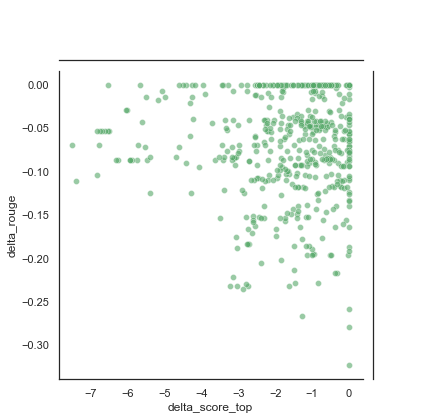

In [24]:

# Use JointGrid directly to draw a custom plot
g = sns.JointGrid(data=df, x="delta_score_top", y="delta_rouge")
g.plot_joint(sns.scatterplot,
             color="g", alpha=.6, legend=False)
# g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0059446000622472, 1.048239184562714, 1.2286430127606598, 1.6469934640522876]
[0, 1, 2, 3, 4, 5, 6, 7, 8]


<AxesSubplot:>

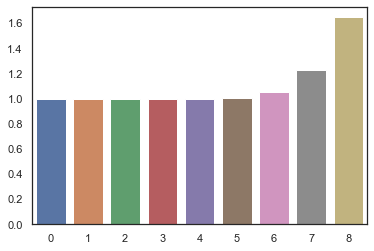

In [25]:
x = df['quant']
l = len(x[0])
import statistics

avg = [ statistics.mean([m[i] for m in x])  for i in range(l)]
print(avg)
x = list(range(0,9,1))
print(x)
sns.barplot(x=x,y=avg)
